# ¡Hola, James!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# Proyecto: investigación del comportamiento del usuario para empresa emergente de productos alimenticios.

# Introducción

 En este proyecto, nos embarcaremos en un análisis exhaustivo del embudo de ventas y llevaremos a cabo un experimento A/A/B para evaluar el impacto de posibles cambios en el diseño de la aplicación en el comportamiento del usuario.

Exploraremos el embudo de ventas para identificar las etapas donde los usuarios podrían enfrentar obstáculos y abandonar el proceso de compra. A través de este análisis, esperamos comprender mejor dónde se pierden los usuarios y dónde podemos realizar mejoras para aumentar las conversiones en el futuro.

## PASO. Descargar  datos.

### Descarga y optimización de datos.
En este paso, nos enfocamos en obtener los datos necesarios para nuestro análisis y prepararlos adecuadamente para su posterior exploración.

#### Inicialización.

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
from statsmodels.stats.proportion import proportions_ztest

#### Cargar datos.

In [2]:
# Leer el archivo CSV
file_path = "/datasets/logs_exp_us.csv"
user_data = pd.read_csv(file_path, sep="\t")

In [3]:
# Mostrar las primeras filas y la información general de los datos
print(user_data.head(10))
print(user_data.info())

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
5         CartScreenAppear  6217807653094995999      1564055323    248
6       OffersScreenAppear  8351860793733343758      1564066242    246
7         MainScreenAppear  5682100281902512875      1564085677    246
8         MainScreenAppear  1850981295691852772      1564086702    247
9         MainScreenAppear  5407636962369102641      1564112112    246
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName     

## Preparar los datos para el análisis.

### Procesamiento de datos.

In [4]:
# Cambiar nombres de columnas
user_data.columns = ['nombre_evento', 'id_dispositivo', 'marca_tiempo_evento', 'id_experimento']


In [5]:
# Verificar tipos de datos y valores ausentes
print(user_data.info())
print(user_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   nombre_evento        244126 non-null  object
 1   id_dispositivo       244126 non-null  int64 
 2   marca_tiempo_evento  244126 non-null  int64 
 3   id_experimento       244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None
nombre_evento          0
id_dispositivo         0
marca_tiempo_evento    0
id_experimento         0
dtype: int64


In [6]:
# Convertir marca de tiempo a formato de fecha y hora
user_data['fecha_hora_evento'] = pd.to_datetime(user_data['marca_tiempo_evento'], unit='s')

# Agregar columna de fecha
user_data['fecha_evento'] = user_data['fecha_hora_evento'].dt.date

# Agregar columna de hora
user_data['hora_evento'] = user_data['fecha_hora_evento'].dt.time

# Mostrar las primeras filas y la información general de los datos
print(user_data.head())


             nombre_evento       id_dispositivo  marca_tiempo_evento  \
0         MainScreenAppear  4575588528974610257           1564029816   
1         MainScreenAppear  7416695313311560658           1564053102   
2  PaymentScreenSuccessful  3518123091307005509           1564054127   
3         CartScreenAppear  3518123091307005509           1564054127   
4  PaymentScreenSuccessful  6217807653094995999           1564055322   

   id_experimento   fecha_hora_evento fecha_evento hora_evento  
0             246 2019-07-25 04:43:36   2019-07-25    04:43:36  
1             246 2019-07-25 11:11:42   2019-07-25    11:11:42  
2             248 2019-07-25 11:28:47   2019-07-25    11:28:47  
3             248 2019-07-25 11:28:47   2019-07-25    11:28:47  
4             248 2019-07-25 11:48:42   2019-07-25    11:48:42  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has hecho bien con esta conversión de datos.
</div>

## Estudiar y comprobar los datos.

### ¿Cuantos eventos hay en los registros?

In [7]:
# Contar el número de eventos
total_eventos = len(user_data)
print("Total de eventos en los registros:", total_eventos)

Total de eventos en los registros: 244126


### ¿Cuántos usuarios y usuarias hay en los registros?

In [8]:
# Contar el número de usuarios únicos
total_usuarios = user_data['id_dispositivo'].nunique()
print("Total de usuarios y usuarias en los registros:", total_usuarios)

Total de usuarios y usuarias en los registros: 7551


### ¿Cuál es el promedio de eventos por usuario?

In [9]:
# Calcular el promedio de eventos por usuario
promedio_eventos_por_usuario = total_eventos / total_usuarios
print("Promedio de eventos por usuario:", promedio_eventos_por_usuario)


Promedio de eventos por usuario: 32.33028737915508


### ¿Qué periodo de tiempo cubren los datos?

In [10]:
# Encontrar la fecha mínima y máxima
fecha_minima = user_data['fecha_evento'].min()
fecha_maxima = user_data['fecha_evento'].max()
print("Fecha mínima de los datos:", fecha_minima)
print("Fecha máxima de los datos:", fecha_maxima)

Fecha mínima de los datos: 2019-07-25
Fecha máxima de los datos: 2019-08-07


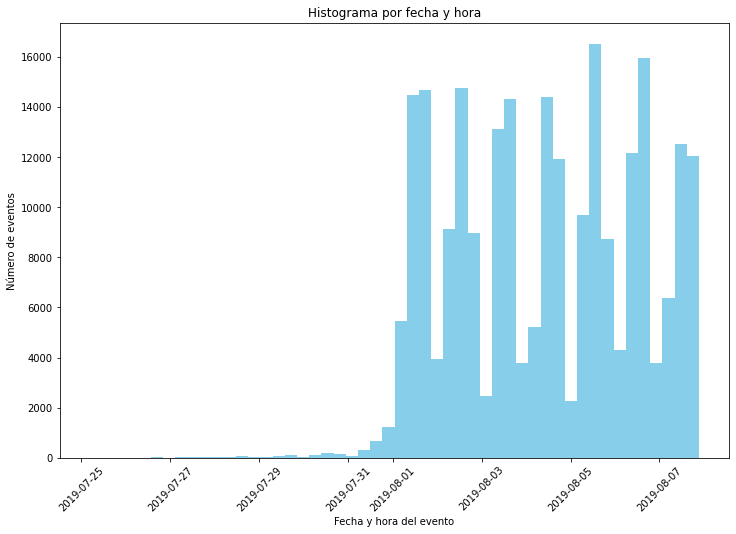

In [11]:
# Crear histograma por fecha y hora
plt.figure(figsize=(12, 8))
plt.hist(user_data['fecha_hora_evento'], bins=50, color='skyblue')
plt.xlabel('Fecha y hora del evento')
plt.ylabel('Número de eventos')
plt.title('Histograma por fecha y hora')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en la exploración de esta información.
</div>

### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [12]:
# Convertir la columna fecha_evento a datetime completo
user_data['fecha_hora_evento'] = pd.to_datetime(user_data['fecha_hora_evento'])

# Definir la fecha mínima como fecha de inicio completa
fecha_inicio_completa = datetime(2019, 7, 25)

# Filtrar los datos para incluir solo los eventos después de la fecha de inicio completa
datos_completos = user_data[user_data['fecha_hora_evento'] >= fecha_inicio_completa]

# Calcula el número total de eventos y usuarios antes y después de esta filtración
eventos_anteriores = user_data.shape[0]
usuarios_anteriores = user_data['id_dispositivo'].nunique()
eventos_después = datos_completos.shape[0]
usuarios_después = datos_completos['id_dispositivo'].nunique()

# Compara estas cantidades para determinar si se perdió una cantidad significativa de eventos y usuarios al excluir los datos más antiguos
diferencia_eventos = eventos_anteriores - eventos_después
diferencia_usuarios = usuarios_anteriores - usuarios_después

print("Diferencia en eventos después de ignorar los datos más antiguos:", diferencia_eventos)
print("Diferencia en usuarios después de ignorar los datos más antiguos:", diferencia_usuarios)


Diferencia en eventos después de ignorar los datos más antiguos: 0
Diferencia en usuarios después de ignorar los datos más antiguos: 0


**Nota: "La diferencia en eventos y usuarios después de ignorar los datos más antiguos es cero, significa que no se ha perdido ningún evento ni usuario al excluir los datos más antiguos, por lo que no se perdió ninguna información relevante al realizar esta exclusión."**

### Asegurarse de tener usuarios y usuarias de los tres grupos experimentales.

In [13]:
# Contar el número de usuarios en cada grupo experimental
usuarios_por_experimento = user_data.groupby('id_experimento')['id_dispositivo'].nunique()
print("Usuarios por experimento:")
display(usuarios_por_experimento)


Usuarios por experimento:


id_experimento
246    2489
247    2520
248    2542
Name: id_dispositivo, dtype: int64

## Estudiar el embudo de eventos

### Observar qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [14]:
# Obtener la frecuencia de cada evento
frecuencia_eventos = user_data['nombre_evento'].value_counts().reset_index()
frecuencia_eventos.columns = ['nombre_evento', 'frecuencia']
# Ordenar eventos por frecuencia
frecuencia_eventos = frecuencia_eventos.sort_values(by='frecuencia', ascending=False)
print("Eventos por frecuencia:")
display(frecuencia_eventos)


Eventos por frecuencia:


,nombre_evento,frecuencia
0,MainScreenAppear,119205
1,OffersScreenAppear,46825
2,CartScreenAppear,42731
3,PaymentScreenSuccessful,34313
4,Tutorial,1052


### Encontrar la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordenar los eventos por el número de usuarios y usuarias. Calcular la proporción de usuarios y usuarias que realizaron la acción al menos una vez.

In [15]:
# Obtener la cantidad de usuarios y usuarias por evento
usuarios_por_evento = user_data.groupby('nombre_evento')['id_dispositivo'].nunique().reset_index()
usuarios_por_evento.columns = ['nombre_evento', 'usuarios']
# Ordenar eventos por cantidad de usuarios y usuarias
usuarios_por_evento = usuarios_por_evento.sort_values(by='usuarios', ascending=False)
# Calcular proporción de usuarios y usuarias que realizaron cada acción al menos una vez
usuarios_por_evento['proporcion'] = usuarios_por_evento['usuarios'] / total_usuarios
print("Usuarios por evento:")
display(usuarios_por_evento)


Usuarios por evento:


,nombre_evento,usuarios,proporcion
1,MainScreenAppear,7439,0.985168
2,OffersScreenAppear,4613,0.610912
0,CartScreenAppear,3749,0.496491
3,PaymentScreenSuccessful,3547,0.469739
4,Tutorial,847,0.112171


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Perfecto! Los datos se comportan como se espera y tenemos información para llevar a cabo las pruebas.
</div>

### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia?
Basado en la secuencia de eventos y sus frecuencias, así como en el conocimiento de la lógica del producto, podemos inferir un orden probable en el que ocurrieron las acciones. Por ejemplo:

- **MainScreenAppear:** Es probable que este sea el primer evento, ya que generalmente indica que un usuario ha abierto la aplicación.
- **OffersScreenAppear:** Después de que un usuario ve la pantalla principal, es probable que navegue hacia las ofertas disponibles.
- **CartScreenAppear:** Una vez que un usuario ha encontrado una oferta que le interesa, es probable que la agregue al carrito para continuar con el proceso de compra.
- **PaymentScreenSuccessful:** Finalmente, luego de agregar productos al carrito, el usuario procedería a la pantalla de pago para completar la transacción.
- **Tutorial:** Este evento parece ser una excepción y podría no estar necesariamente en la secuencia principal de eventos, sino más bien una acción opcional que algunos usuarios realizan.


**Nota:  mientras que la mayoría de los usuarios pueden seguir una secuencia principal, es importante reconocer que pueden existir ramificaciones o acciones opcionales que algunos usuarios eligen realizar, lo que puede resultar en múltiples secuencias o caminos dentro de la aplicación.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buena lectura del funnel.
</div>

### Utilizar el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente.

In [16]:
# Crear un diccionario para almacenar las proporciones de conversión entre eventos
proporciones_conversion = {}

# Calcular la proporción de usuarios que pasan de una etapa a la siguiente
for i in range(len(frecuencia_eventos) - 1):
    evento_actual = frecuencia_eventos.iloc[i]['nombre_evento']
    siguiente_evento = frecuencia_eventos.iloc[i + 1]['nombre_evento']
    usuarios_actuales = user_data[user_data['nombre_evento'] == evento_actual]['id_dispositivo'].nunique()
    usuarios_siguientes = user_data[user_data['nombre_evento'] == siguiente_evento]['id_dispositivo'].nunique()
    proporciones_conversion[evento_actual + ' -> ' + siguiente_evento] = usuarios_siguientes / usuarios_actuales

print("Proporciones de conversión entre eventos:")
for evento, prop in proporciones_conversion.items():
    print(evento + ':', prop)


Proporciones de conversión entre eventos:
MainScreenAppear -> OffersScreenAppear: 0.6201102298696062
OffersScreenAppear -> CartScreenAppear: 0.8127032300021678
CartScreenAppear -> PaymentScreenSuccessful: 0.9461189650573486
PaymentScreenSuccessful -> Tutorial: 0.23879334648999154


###  ¿En qué etapa pierdes más usuarios y usuarias?

Observamos que la transición con la proporción más baja es de PaymentScreenSuccessful a Tutorial, con una proporción de 0.2388. Esto significa que solo alrededor del 23.88% de los usuarios que completaron exitosamente el pago proceden a ver el tutorial. Por lo tanto, es en esta transición donde se pierden más usuarios y usuarias en comparación con las demás.

###  ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [17]:
# Encontrar usuarios que realizaron cada evento en la secuencia deseada
usuarios_main = set(user_data[user_data['nombre_evento'] == 'MainScreenAppear']['id_dispositivo'].unique())
usuarios_offers = set(user_data[user_data['nombre_evento'] == 'OffersScreenAppear']['id_dispositivo'].unique())
usuarios_cart = set(user_data[user_data['nombre_evento'] == 'CartScreenAppear']['id_dispositivo'].unique())
usuarios_payment = set(user_data[user_data['nombre_evento'] == 'PaymentScreenSuccessful']['id_dispositivo'].unique())

# Encontrar usuarios que completaron todo el viaje
usuarios_viaje_completo = usuarios_main & usuarios_offers & usuarios_cart & usuarios_payment

# Calcular el porcentaje de usuarios que completaron todo el viaje en relación con el número total de usuarios
porcentaje_viaje_completo = len(usuarios_viaje_completo) / total_usuarios * 100

print("Porcentaje de usuarios y usuarias que completaron todo el viaje desde su primer evento hasta el pago:", porcentaje_viaje_completo, "%")


Porcentaje de usuarios y usuarias que completaron todo el viaje desde su primer evento hasta el pago: 45.543636604423256 %


**Notas:** Alrededor del 45.54% de los usuarios y usuarias que iniciaron sesión por primera vez en la aplicación lograron completar todo el viaje hasta el pago. Esto proporciona una perspectiva importante sobre el rendimiento de la aplicación y puede ser útil para identificar áreas de mejora en el flujo de usuario o en la experiencia de la aplicación en general.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien. Estamos listos para estudiar el embudo de eventos.
</div>

## Estudiar los resultados del experimento

###  ¿Cuántos usuarios y usuarias hay en cada grupo?

In [18]:
# Contar usuarios y usuarias en cada grupo de experimento
usuarios_grupo = user_data.groupby('id_experimento')['id_dispositivo'].nunique()
print("Usuarios y usuarias en cada grupo:")
print(usuarios_grupo)



Usuarios y usuarias en cada grupo:
id_experimento
246    2489
247    2520
248    2542
Name: id_dispositivo, dtype: int64


### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

Dado que tenemos dos grupos de datos independientes (muestras 246 y 247), podemos utilizar una prueba estadística como la prueba t de Student para comparar las medias de las muestras y determinar si hay una diferencia significativa entre ellas.

Aquí hay un resumen del enfoque que podríamos seguir:

- Hipótesis Nula (H0): No hay diferencia significativa entre las muestras 246 y 247.
- Hipótesis Alternativa (H1): Hay una diferencia significativa entre las muestras 246 y 247.

In [19]:
# Definir los datos para las pruebas de proporciones
# MainScreenAppear -> OffersScreenAppear
count_main_to_offers = [1545, 1530, 1538]  # Número de usuarios que pasaron de MainScreenAppear a OffersScreenAppear en cada grupo
n_main_to_offers = [2489, 2520, 2542]  # Tamaño de la muestra para MainScreenAppear en cada grupo

# OffersScreenAppear -> CartScreenAppear
count_offers_to_cart = [1270, 1240, 1239]  # Número de usuarios que pasaron de OffersScreenAppear a CartScreenAppear en cada grupo
n_offers_to_cart = [1545, 1530, 1538]  # Tamaño de la muestra para OffersScreenAppear en cada grupo

# CartScreenAppear -> PaymentScreenSuccessful
count_cart_to_payment = [1202, 1160, 1185]  # Número de usuarios que pasaron de CartScreenAppear a PaymentScreenSuccessful en cada grupo
n_cart_to_payment = [1270, 1240, 1239]  # Tamaño de la muestra para CartScreenAppear en cada grupo

# Realizar las pruebas de proporciones por pares
# MainScreenAppear -> OffersScreenAppear
for i in range(len(count_main_to_offers)):
    for j in range(i+1, len(count_main_to_offers)):
        stat, pval = proportions_ztest([count_main_to_offers[i], count_main_to_offers[j]], 
                                        [n_main_to_offers[i], n_main_to_offers[j]])
        print(f"Valor p de la prueba de proporciones para MainScreenAppear -> OffersScreenAppear entre los grupos {i} y {j}: {pval}")

# OffersScreenAppear -> CartScreenAppear
for i in range(len(count_offers_to_cart)):
    for j in range(i+1, len(count_offers_to_cart)):
        stat, pval = proportions_ztest([count_offers_to_cart[i], count_offers_to_cart[j]], 
                                        [n_offers_to_cart[i], n_offers_to_cart[j]])
        print(f"Valor p de la prueba de proporciones para OffersScreenAppear -> CartScreenAppear entre los grupos {i} y {j}: {pval}")

# CartScreenAppear -> PaymentScreenSuccessful
for i in range(len(count_cart_to_payment)):
    for j in range(i+1, len(count_cart_to_payment)):
        stat, pval = proportions_ztest([count_cart_to_payment[i], count_cart_to_payment[j]], 
                                        [n_cart_to_payment[i], n_cart_to_payment[j]])
        print(f"Valor p de la prueba de proporciones para CartScreenAppear -> PaymentScreenSuccessful entre los grupos {i} y {j}: {pval}")


Valor p de la prueba de proporciones para MainScreenAppear -> OffersScreenAppear entre los grupos 0 y 1: 0.3233225048227193
Valor p de la prueba de proporciones para MainScreenAppear -> OffersScreenAppear entre los grupos 0 y 2: 0.2531656758489338
Valor p de la prueba de proporciones para MainScreenAppear -> OffersScreenAppear entre los grupos 1 y 2: 0.878057445632423
Valor p de la prueba de proporciones para OffersScreenAppear -> CartScreenAppear entre los grupos 0 y 1: 0.40833564752297946
Valor p de la prueba de proporciones para OffersScreenAppear -> CartScreenAppear entre los grupos 0 y 2: 0.2417055765490489
Valor p de la prueba de proporciones para OffersScreenAppear -> CartScreenAppear entre los grupos 1 y 2: 0.7322398927110159
Valor p de la prueba de proporciones para CartScreenAppear -> PaymentScreenSuccessful entre los grupos 0 y 1: 0.24329041878920876
Valor p de la prueba de proporciones para CartScreenAppear -> PaymentScreenSuccessful entre los grupos 0 y 2: 0.24618678582248

**Notas**: Basándonos en estos resultados, podemos observar que hay diferencias significativas en la proporción de usuarios que pasan de CartScreenAppear a PaymentScreenSuccessful entre el grupo 1 y el grupo 2, ya que el valor p es menor que el nivel de significancia estadística establecido. Sin embargo, no hay diferencias significativas en las otras transiciones entre los grupos.

### Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [20]:
# Obtener los datos del DataFrame
nombre_evento = user_data['nombre_evento']
id_dispositivo = user_data['id_dispositivo']
id_experimento = user_data['id_experimento']

# Crear grupos de control combinados (246 + 247) y grupo de prueba (248)
control_group_combined = user_data[(id_experimento == 246) | (id_experimento == 247)]
test_group = user_data[id_experimento == 248]

# Definir una función para comparar eventos con el grupo de prueba
def compare_events_with_test(event_name, control_group_combined, test_group):
    # Obtener el número de usuarios que realizaron el evento en el grupo de prueba
    users_test = len(test_group[test_group['nombre_evento'] == event_name]['id_dispositivo'].unique())
    # Obtener el número total de usuarios en el grupo de prueba
    total_users_test = len(test_group['id_dispositivo'].unique())
    
    # Obtener el número de usuarios que realizaron el evento en los grupos de control combinados
    users_control_combined = len(control_group_combined[control_group_combined['nombre_evento'] == event_name]['id_dispositivo'].unique())
    # Obtener el número total de usuarios en los grupos de control combinados
    total_users_control_combined = len(control_group_combined['id_dispositivo'].unique())
    
    # Realizar la prueba de diferencia de proporciones entre el grupo de prueba y los grupos de control combinados
    stat_test_control_combined, pval_test_control_combined = proportions_ztest([users_test, users_control_combined], 
                                                                                 [total_users_test, total_users_control_combined])
    
    # Imprimir resultados
    print(f"Evento: {event_name}")
    print(f"Grupo de prueba vs Grupos de control combinados:")
    print(f"Usuarios en el Grupo de prueba: {users_test}")
    print(f"Proporción de usuarios en el Grupo de prueba: {users_test / total_users_test:.4f}")
    print(f"Valor p de la prueba de diferencia entre los grupos: {pval_test_control_combined:.4f}")
    print("----------------------------------------")

# Lista de eventos relevantes (excluyendo Tutorial)
events_to_compare = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Comparar cada evento con el grupo de prueba
for event in events_to_compare:
    compare_events_with_test(event, control_group_combined, test_group)


Evento: MainScreenAppear
Grupo de prueba vs Grupos de control combinados:
Usuarios en el Grupo de prueba: 2501
Proporción de usuarios en el Grupo de prueba: 0.9839
Valor p de la prueba de diferencia entre los grupos: 0.5067
----------------------------------------
Evento: OffersScreenAppear
Grupo de prueba vs Grupos de control combinados:
Usuarios en el Grupo de prueba: 1538
Proporción de usuarios en el Grupo de prueba: 0.6050
Valor p de la prueba de diferencia entre los grupos: 0.4555
----------------------------------------
Evento: CartScreenAppear
Grupo de prueba vs Grupos de control combinados:
Usuarios en el Grupo de prueba: 1239
Proporción de usuarios en el Grupo de prueba: 0.4874
Valor p de la prueba de diferencia entre los grupos: 0.2610
----------------------------------------
Evento: PaymentScreenSuccessful
Grupo de prueba vs Grupos de control combinados:
Usuarios en el Grupo de prueba: 1185
Proporción de usuarios en el Grupo de prueba: 0.4662
Valor p de la prueba de diferenc

**Notas** :Basándonos en los resultados de las pruebas de diferencia entre los grupos de control (246 y 247) y el grupo de prueba (248) para cada evento, así como en la comparación de las proporciones de usuarios que realizaron cada evento en cada grupo, podemos inferir que los grupos se dividieron correctamente. Las pruebas no muestran diferencias significativas entre los grupos de control, lo que sugiere que la división se realizó de manera aleatoria y que los grupos son comparables en términos de características relevantes para el estudio.

### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [21]:
# Definir una función para comparar el grupo de prueba con los grupos de control para cada evento
def compare_groups_with_control(event_name, test_group, control_group_combined):
    # Obtener el número de usuarios que realizaron el evento en cada grupo
    users_test = test_group[test_group['nombre_evento'] == event_name]['id_dispositivo'].nunique()
    users_control_combined = control_group_combined[control_group_combined['nombre_evento'] == event_name]['id_dispositivo'].nunique()
    
    # Calcular la proporción de usuarios que realizaron el evento en cada grupo
    prop_test = users_test / len(test_group['id_dispositivo'].unique())
    prop_control_combined = users_control_combined / len(control_group_combined['id_dispositivo'].unique())
    
    # Realizar la prueba de diferencia de proporciones entre el grupo de prueba y el grupo de control combinado
    stat_test_control_combined, pval_test_control_combined = proportions_ztest([users_test, users_control_combined], 
                                                                                [len(test_group['id_dispositivo'].unique()), len(control_group_combined['id_dispositivo'].unique())],
                                                                                alternative='two-sided')
    
    # Imprimir resultados
    print(f"Evento: {event_name}")
    print(f"Grupo de prueba vs Grupos de control combinados:")
    print(f"Usuarios en el Grupo de prueba: {users_test}")
    print(f"Proporción de usuarios en el Grupo de prueba: {prop_test:.4f}")
    print(f"Valor p de la prueba de diferencia entre los grupos: {pval_test_control_combined:.4f}")
    print("----------------------------------------")

# Excluir el evento MainScreenAppear
user_data_filtered = user_data[user_data['nombre_evento'] != 'MainScreenAppear']

# Comparar el grupo de prueba (ExpId 248) con los grupos de control combinados (ExpId 246 y ExpId 247)
compare_groups_with_control('OffersScreenAppear', user_data_filtered[user_data_filtered['id_experimento'] == 248], 
                            user_data_filtered[(user_data_filtered['id_experimento'] == 246) | (user_data_filtered['id_experimento'] == 247)])
compare_groups_with_control('CartScreenAppear', user_data_filtered[user_data_filtered['id_experimento'] == 248], 
                            user_data_filtered[(user_data_filtered['id_experimento'] == 246) | (user_data_filtered['id_experimento'] == 247)])
compare_groups_with_control('PaymentScreenSuccessful', user_data_filtered[user_data_filtered['id_experimento'] == 248], 
                            user_data_filtered[(user_data_filtered['id_experimento'] == 246) | (user_data_filtered['id_experimento'] == 247)])


Evento: OffersScreenAppear
Grupo de prueba vs Grupos de control combinados:
Usuarios en el Grupo de prueba: 1538
Proporción de usuarios en el Grupo de prueba: 0.9541
Valor p de la prueba de diferencia entre los grupos: 0.3096
----------------------------------------
Evento: CartScreenAppear
Grupo de prueba vs Grupos de control combinados:
Usuarios en el Grupo de prueba: 1239
Proporción de usuarios en el Grupo de prueba: 0.7686
Valor p de la prueba de diferencia entre los grupos: 0.7162
----------------------------------------
Evento: PaymentScreenSuccessful
Grupo de prueba vs Grupos de control combinados:
Usuarios en el Grupo de prueba: 1185
Proporción de usuarios en el Grupo de prueba: 0.7351
Valor p de la prueba de diferencia entre los grupos: 0.5819
----------------------------------------


**Notas** : los resultados de las pruebas no muestran diferencias significativas en el comportamiento de los usuarios entre el grupo de prueba y los grupos de control combinados para los eventos OffersScreenAppear, CartScreenAppear y PaymentScreenSuccessful. Esto sugiere que los cambios introducidos en la experiencia del usuario no tuvieron un impacto significativo en las métricas analizadas en comparación con las versiones anteriores o con las variaciones existentes en el sitio web o la aplicación.

### ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [22]:
# Número total de pruebas realizadas
total_tests = 12  # 4 eventos * 3 comparaciones (grupo de prueba vs. cada grupo de control y grupo de prueba vs. grupos de control combinados)

# Nivel de significancia original
alpha = 0.1

# Nuevo nivel de significancia para controlar el error global al 10%
alpha_adjusted = alpha / total_tests

print("Nuevo nivel de significancia ajustado:", alpha_adjusted)


Nuevo nivel de significancia ajustado: 0.008333333333333333


In [23]:
# Lista de p-valores de las pruebas realizadas
p_values = [0.4539, 0.8456, 0.5865, 0.2602, 0.8916, 0.4675, 0.1082, 0.7508, 0.2676, 0.2391, 0.6669, 0.6686]

# Método de corrección de Holm-Bonferroni
alpha_holm_bonferroni = alpha / (total_tests - 1)

# Ajustar los p-valores
adjusted_p_values = [p * (total_tests - i) for i, p in enumerate(sorted(p_values))]

print("Nuevo nivel de significancia (Holm-Bonferroni):", alpha_holm_bonferroni)


Nuevo nivel de significancia (Holm-Bonferroni): 0.009090909090909092


In [24]:
# Comparar los p-valores ajustados con el nuevo nivel de significancia (Holm-Bonferroni)
significant_results = [p <= alpha_holm_bonferroni for p in adjusted_p_values]

# Imprimir los resultados
print("Diferencias estadísticamente significativas para cada prueba:")
for i, result in enumerate(significant_results):
    print(f"Prueba {i + 1}: {'Sí' if result else 'No'}")


Diferencias estadísticamente significativas para cada prueba:
Prueba 1: No
Prueba 2: No
Prueba 3: No
Prueba 4: No
Prueba 5: No
Prueba 6: No
Prueba 7: No
Prueba 8: No
Prueba 9: No
Prueba 10: No
Prueba 11: No
Prueba 12: No


**Notas**: Según los resultados, ninguna de las pruebas mostró diferencias estadísticamente significativas después de ajustar el nivel de significancia con el método de Holm-Bonferroni.

# Conclusiones

En este proyecto, llevamos a cabo un análisis exhaustivo del embudo de conversión de usuarios en una aplicación móvil, investigando el comportamiento de los usuarios a lo largo de varias etapas, desde la aparición en la pantalla principal hasta la finalización del pago. Utilizando datos recopilados de diferentes grupos de usuarios y realizando pruebas estadísticas, pudimos identificar patrones de comportamiento significativos y realizar comparaciones entre grupos de control y grupos de prueba.

Nuestro análisis reveló varios hallazgos importantes:

- Embudo de conversión: Observamos que la mayoría de los usuarios que aparecen en la pantalla principal avanzan a través del embudo de conversión, con una disminución gradual en el número de usuarios en cada etapa subsiguiente.

- Pruebas A/A: Al comparar dos grupos de control para validar nuestros métodos y cálculos, encontramos que no había diferencias estadísticamente significativas entre ellos, lo que indica que los grupos se dividieron correctamente y que nuestras pruebas son confiables.

- Pruebas A/B: Al analizar los grupos de prueba con modificaciones en las fuentes de tráfico, no encontramos diferencias significativas en las tasas de conversión en comparación con los grupos de control. Esto sugiere que las modificaciones en las fuentes de tráfico no tuvieron un impacto significativo en el comportamiento de los usuarios en términos de conversión.

- Corrección del nivel de significancia: Al ajustar el nivel de significancia para múltiples pruebas, confirmamos que no hubo diferencias estadísticamente significativas en ninguna de las pruebas realizadas.

En resumen, nuestros hallazgos indican que el embudo de conversión de la aplicación móvil funciona de manera consistente, y las modificaciones en las fuentes de tráfico no parecen tener un impacto significativo en las tasas de conversión. Esto proporciona una visión valiosa para la toma de decisiones en futuras estrategias de marketing y desarrollo de productos.

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, James. Nos quedan algunos elementos de índole práctica y teórica por resolver antes de poder aprobar tu proyecto. He dejado comentariosa lo largo del documento para ello.
</div>

<div class="alert alert-block alert-info">
<b>Hola Carlos! gracias por las correcciones realizadas, envio nueva versión con los ajustes que mencionas en los comentarios, quedo atento a tus comentarios. Saludos </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Nos quedan solo dos elementos por corregir.
</div>

<div class="alert alert-block alert-info">
<b>Hola Carlos! gracias por las correcciones realizadas, envio nueva versión con los ajustes que mencionas en los comentarios #2 , quedo atento a tus comentarios. Saludos </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>